In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import os

In [7]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [8]:
train.shape

(42000, 785)

In [9]:
test.shape

(28000, 784)

In [10]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_Y=train['label']
train_X=train.drop(labels=['label'],axis=1)

In [13]:
train_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
#Bringing to smaller scale using Normalization
train_X=train_X/255.0
test=test/255.0

In [16]:
#Reshape into 3d 
train_X=train_X.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [17]:
train_Y=to_categorical(train_Y,num_classes=10)

In [18]:
train_Y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
X_train,X_val,Y_train,Y_val=train_test_split(train_X,train_Y,test_size=0.1,random_state=1)

In [20]:
X_train.shape

(37800, 28, 28, 1)

In [21]:
X_val.shape

(4200, 28, 28, 1)

In [22]:
Y_val.shape

(4200, 10)

In [23]:
Y_train.shape

(37800, 10)

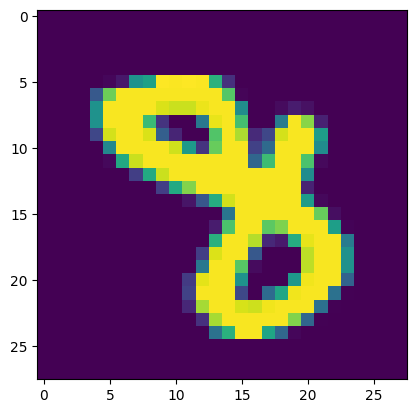

In [24]:
g=plt.imshow(X_train[1][:,:,0])

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

In [26]:
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Dropout(0.25),

    Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Dropout(0.25),

    Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [27]:
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, Y_train, 
                    batch_size=256, 
                    epochs=50, 
                    validation_data=(X_val, Y_val), 
                    verbose=1)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.5036 - loss: 1.3702 - val_accuracy: 0.9702 - val_loss: 0.1001
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9547 - loss: 0.1531 - val_accuracy: 0.9819 - val_loss: 0.0622
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9712 - loss: 0.0967 - val_accuracy: 0.9843 - val_loss: 0.0507
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9762 - loss: 0.0794 - val_accuracy: 0.9862 - val_loss: 0.0483
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9802 - loss: 0.0713 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9823 - loss: 0.0597 - val_accuracy: 0.9907 - val_loss: 0.0333
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9855 - loss: 0.0506 - val_accuracy: 0.9867 - val_loss: 0.0382
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9857 - loss: 0.0463 -

In [29]:
results=model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [30]:
results[0]

array([3.3257429e-18, 2.5104200e-19, 1.0000000e+00, 6.5103777e-12,
       8.8449847e-17, 1.3235187e-20, 1.3659199e-16, 6.8604315e-14,
       1.6932238e-15, 3.3960608e-19], dtype=float32)

In [31]:
results=np.argmax(results,axis=1)

In [32]:
results[0]

2

In [33]:
results=pd.Series(results,name='Label')

In [34]:
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [35]:
submission=pd.concat([pd.Series(range(1,280001),name="ImageId"),results],axis=1)

In [36]:
submission.to_csv("result_mnist.csv",index=False)

In [37]:
import pickle

In [39]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
